# Fig.5b Robustness of illegal content probabilities 


In [ ]:
import pandas as pd
from plot_helpers import (
    get_agg_metric,
    patch_violinplot,
    point_violinplot,
    bonferroni_correction,
    get_corrected_p,
    get_annotation,
    add_annotation,
    BLUEPALETTE,
)

# Read data

In [6]:
exp_type = "vary_illegal_probability"
data = pd.read_parquet(f"data/{exp_type}.parquet")

In [7]:
data.head()

,illegal_frac,unique_illegal_frac,illegal_count,unique_illegal_count,illegal_prob,half_life
0,0.000858,0.001216,194,47,0.0009,-1.0
1,0.001712,0.001807,387,71,0.0020,-1.0
2,0.010330,0.009838,2335,383,0.0100,-1.0
3,0.000168,0.000155,38,6,0.0001,-1.0
4,0.001004,0.000990,227,40,0.0010,-1.0


# Pct change: metric-baseline_median / (baseline_median)

In [8]:
baseline = data[data.half_life == -1]
baseline

,illegal_frac,unique_illegal_frac,illegal_count,unique_illegal_count,illegal_prob,half_life
0,0.000858,0.001216,194,47,0.0009,-1.0
1,0.001712,0.001807,387,71,0.0020,-1.0
2,0.010330,0.009838,2335,383,0.0100,-1.0
3,0.000168,0.000155,38,6,0.0001,-1.0
4,0.001004,0.000990,227,40,0.0010,-1.0
...,...,...,...,...,...,...
628,0.000641,0.000782,145,31,0.0009,-1.0
630,0.001924,0.001788,435,70,0.0020,-1.0
631,0.011635,0.011424,2629,441,0.0100,-1.0
632,0.000058,0.000177,13,7,0.0001,-1.0


In [9]:
# create a new column since illegal_prob is used as a dummy column
data["illegal_content_probability"] = data["illegal_prob"]
baseline = data[data.half_life == -1]

baseline = get_agg_metric(
    baseline,
    group_key=["illegal_prob"],
    new_col_prefix="baseline",
    metrics=[
        "illegal_frac",
        "unique_illegal_frac",
    ],
    retain_keys=["illegal_content_probability", "half_life"],
)

/geode2/home/u015/baotruon/BigRed200/simsom_removal/experiments/figures/plot_helpers.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{metric}_std"] = df[metric]


In [10]:
baseline

,baseline_illegal_frac_mean,baseline_unique_illegal_frac_mean,baseline_illegal_frac_std,baseline_unique_illegal_frac_std,baseline_no_observations,illegal_content_probability,half_life
0,0.000115,0.000129,0.000070,0.000053,0.0001,0.0001,-1.0
1,0.000304,0.000322,0.000112,0.000070,0.0003,0.0003,-1.0
2,0.000900,0.000913,0.000227,0.000170,0.0009,0.0009,-1.0
3,0.001048,0.001046,0.000325,0.000130,0.0010,0.0010,-1.0
4,0.002100,0.001994,0.000340,0.000198,0.0020,0.0020,-1.0
5,0.009118,0.008938,0.000675,0.000553,0.0090,0.0090,-1.0
6,0.010575,0.010435,0.000971,0.000594,0.0100,0.0100,-1.0


## Get pct change

In [11]:
results = data[data.half_life != -1]
baseline = baseline.drop(columns=["half_life"])
results = results.merge(baseline, on="illegal_content_probability", how="left")

In [12]:
results.head()

,illegal_frac,unique_illegal_frac,illegal_count,unique_illegal_count,illegal_prob,half_life,illegal_content_probability,baseline_illegal_frac_mean,baseline_unique_illegal_frac_mean,baseline_illegal_frac_std,baseline_unique_illegal_frac_std,baseline_no_observations
0,0.004771,0.003506,1077,139,0.0090,2.0,0.0090,0.009118,0.008938,0.000675,0.000553,0.0090
1,0.000097,0.000077,22,3,0.0001,2.0,0.0001,0.000115,0.000129,0.000070,0.000053,0.0001
2,0.004428,0.003814,999,149,0.0100,2.0,0.0100,0.010575,0.010435,0.000971,0.000594,0.0100
3,0.000142,0.000104,32,4,0.0003,2.0,0.0003,0.000304,0.000322,0.000112,0.000070,0.0003
4,0.000726,0.000542,164,21,0.0020,2.0,0.0020,0.002100,0.001994,0.000340,0.000198,0.0020


In [13]:
results = results[~results.unique_illegal_frac.isna()]

In [14]:
metric = "unique_illegal_frac"
results["pct_change"] = (
    (results[f"baseline_{metric}_mean"] - results[metric])
    / results[f"baseline_{metric}_mean"]
    * 100
)

In [15]:
results.head()

,illegal_frac,unique_illegal_frac,illegal_count,unique_illegal_count,illegal_prob,half_life,illegal_content_probability,baseline_illegal_frac_mean,baseline_unique_illegal_frac_mean,baseline_illegal_frac_std,baseline_unique_illegal_frac_std,baseline_no_observations,pct_change
0,0.004771,0.003506,1077,139,0.0090,2.0,0.0090,0.009118,0.008938,0.000675,0.000553,0.0090,60.771406
1,0.000097,0.000077,22,3,0.0001,2.0,0.0001,0.000115,0.000129,0.000070,0.000053,0.0001,40.471198
2,0.004428,0.003814,999,149,0.0100,2.0,0.0100,0.010575,0.010435,0.000971,0.000594,0.0100,63.447197
3,0.000142,0.000104,32,4,0.0003,2.0,0.0003,0.000304,0.000322,0.000112,0.000070,0.0003,67.826505
4,0.000726,0.000542,164,21,0.0020,2.0,0.0020,0.002100,0.001994,0.000340,0.000198,0.0020,72.816204


In [16]:
results.illegal_prob.unique()

array([0.009 , 0.0001, 0.01  , 0.0003, 0.002 , 0.001 , 0.0009])

# Statistical significance: pct change 

In [17]:
from scipy.stats import mannwhitneyu

stat_res = []
probs = sorted(results.illegal_prob.dropna().unique())
pairs = [
    (probs[i], probs[j]) for i in range(len(probs)) for j in range(i + 1, len(probs))
]
pairs

[(0.0001, 0.0003),
 (0.0001, 0.0009),
 (0.0001, 0.001),
 (0.0001, 0.002),
 (0.0001, 0.009),
 (0.0001, 0.01),
 (0.0003, 0.0009),
 (0.0003, 0.001),
 (0.0003, 0.002),
 (0.0003, 0.009),
 (0.0003, 0.01),
 (0.0009, 0.001),
 (0.0009, 0.002),
 (0.0009, 0.009),
 (0.0009, 0.01),
 (0.001, 0.002),
 (0.001, 0.009),
 (0.001, 0.01),
 (0.002, 0.009),
 (0.002, 0.01),
 (0.009, 0.01)]

## Filter tau=2

In [18]:
focal = results[results.half_life == 2]
for pair in pairs:
    pop1 = focal[focal.illegal_prob == pair[0]]["pct_change"]
    pop2 = focal[focal.illegal_prob == pair[1]]["pct_change"]
    U, p = mannwhitneyu(pop1, pop2, method="exact")
    stat_res.append({"pair": pair, "U": U, "p": p})
df = pd.DataFrame(stat_res)

tau2_res = focal

In [19]:
df["corrected_p"] = df["p"].apply(lambda x: bonferroni_correction(x, len(pairs)))
df

,pair,U,p,corrected_p
0,"(0.0001, 0.0003)",363.0,5.686543e-02,1.000000e+00
1,"(0.0001, 0.0009)",388.0,9.587396e-04,2.013353e-02
2,"(0.0001, 0.001)",282.0,1.693099e-04,3.555509e-03
3,"(0.0001, 0.002)",383.0,2.709294e-04,5.689517e-03
4,"(0.0001, 0.009)",208.0,2.121106e-10,4.454322e-09
5,"(0.0001, 0.01)",242.0,7.117580e-09,1.494692e-07
6,"(0.0003, 0.0009)",855.0,6.983690e-01,1.000000e+00
7,"(0.0003, 0.001)",630.0,2.097051e-01,1.000000e+00
8,"(0.0003, 0.002)",859.0,4.315063e-01,1.000000e+00
9,"(0.0003, 0.009)",1070.0,5.601356e-01,1.000000e+00


## Filter tau=8

In [20]:
focal = results[results.half_life == 8]
for pair in pairs:
    pop1 = focal[focal.illegal_prob == pair[0]]["pct_change"]
    pop2 = focal[focal.illegal_prob == pair[1]]["pct_change"]
    U, p = mannwhitneyu(pop1, pop2, method="exact")
    stat_res.append({"pair": pair, "U": U, "p": p})
df = pd.DataFrame(stat_res)

tau8_res = focal

In [21]:
df["corrected_p"] = df["p"].apply(lambda x: bonferroni_correction(x, len(pairs)))
df

,pair,U,p,corrected_p
0,"(0.0001, 0.0003)",363.0,5.686543e-02,1.000000e+00
1,"(0.0001, 0.0009)",388.0,9.587396e-04,2.013353e-02
2,"(0.0001, 0.001)",282.0,1.693099e-04,3.555509e-03
3,"(0.0001, 0.002)",383.0,2.709294e-04,5.689517e-03
4,"(0.0001, 0.009)",208.0,2.121106e-10,4.454322e-09
5,"(0.0001, 0.01)",242.0,7.117580e-09,1.494692e-07
6,"(0.0003, 0.0009)",855.0,6.983690e-01,1.000000e+00
7,"(0.0003, 0.001)",630.0,2.097051e-01,1.000000e+00
8,"(0.0003, 0.002)",859.0,4.315063e-01,1.000000e+00
9,"(0.0003, 0.009)",1070.0,5.601356e-01,1.000000e+00


## Remove outlier. Check this again

In [22]:
tau8_res = tau8_res[tau8_res["pct_change"] > 0]

# Plot in panel

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("stylesheet.mplstyle")
PLOT_DIR = "plots"
if not os.path.exists(PLOT_DIR):
    os.makedirs(PLOT_DIR)
fpath = os.path.join(PLOT_DIR, f"pct_change_illegal_prob_combine")

In [29]:
probs

[0.0003, 0.0009, 0.001, 0.002, 0.009, 0.01]

In [32]:
BLUEPALETTE[: len(probs)]

['#F18447', '#3863AC', '#209B8A', '#550F6B', '#F8D625', '#BC3684']

Probs:  [0.0003, 0.0009, 0.001, 0.002, 0.009, 0.01]
p-values:                 pair       U         p  corrected_p
0   (0.0003, 0.0009)   855.0  0.698369     1.000000
1    (0.0003, 0.001)   630.0  0.209705     1.000000
2    (0.0003, 0.002)   859.0  0.431506     1.000000
3    (0.0003, 0.009)  1070.0  0.560136     1.000000
4     (0.0003, 0.01)  1051.0  0.729700     1.000000
5    (0.0009, 0.001)   857.0  0.131785     1.000000
6    (0.0009, 0.002)  1120.0  0.177962     1.000000
7    (0.0009, 0.009)  1049.0  0.001502     0.022531
8     (0.0009, 0.01)  1060.0  0.005587     0.083798
9     (0.001, 0.002)  1220.0  0.426606     1.000000
10    (0.001, 0.009)  1471.0  0.415522     1.000000
11     (0.001, 0.01)  1471.0  0.204439     1.000000
12    (0.002, 0.009)  1348.0  0.056872     0.853085
13     (0.002, 0.01)  1388.0  0.196007     1.000000
14     (0.009, 0.01)  2196.0  0.229980     1.000000
Significant pairs (p<0.001):  []
p-values:                 pair      U         p  corrected_p
0   (0.0003,

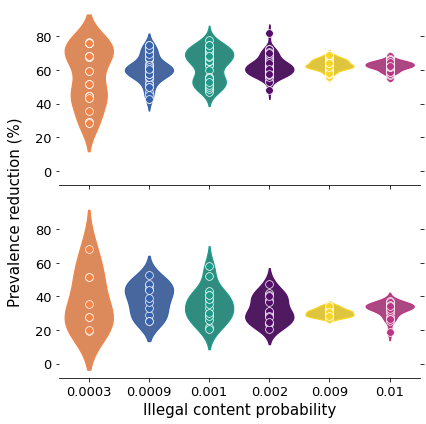

In [ ]:
sig_level = 0.001
plot_dfs = [tau2_res, tau8_res]
y_label = "Prevalence reduction (%)"

fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True, sharey=True)

# Get unique probabilities and sort them
probs = sorted(plot_dfs[0].illegal_content_probability.unique())
probs.remove(0.0001)
print("Probs: ", probs)


for idx, plot_data in enumerate(plot_dfs):
    plot_data = plot_data[plot_data.illegal_content_probability != 0.0001]
    ax = axs[idx]
    # Create the violin plot
    violin = sns.violinplot(
        ax=ax,
        data=plot_data,
        x="illegal_content_probability",
        y="pct_change",
        order=probs,
        inner="point",
        palette=BLUEPALETTE,
        hue="illegal_content_probability",
        legend=False,
    )
    if idx == len(plot_dfs) - 1:
        violin.set_xlabel("Illegal content probability")
    else:
        violin.set_xlabel("")
    violin.set_ylabel("")

    patch_violinplot(ax, palette=BLUEPALETTE, n=len(probs))
    point_violinplot(ax, palette=BLUEPALETTE, n=len(probs), pointsize=60, linewidth=0.7)
    ax.tick_params(labelleft=True, labelright=False, left=True, right=True)
    sns.despine(top=True, left=True, bottom=False)

    ## TEST SIGNIFICANCE
    stats, significant_pairs = get_corrected_p(
        plot_data, focal_col="illegal_content_probability", sig_level=sig_level
    )
    significant_pairs = [
        i for i in significant_pairs if i[0] in probs and i[1] in probs
    ]
    # Add annotations for significant pairs
    y_max = plot_data["pct_change"].max()
    for x1, x2 in significant_pairs:
        stat, p = stats[stats["pair"] == (x1, x2)][["U", "corrected_p"]].values[0]
        if p < sig_level:
            y = y_max + 5  # Adjust the y position for the annotation
            add_annotation(ax, probs.index(x1), probs.index(x2), y, get_annotation(p))
            print(f"Pair ( {x1}, {x2} ): p-value: {p:.2e}")
            y_max += 10  # Increment y_max for the next annotation

    # ax.set_ylim(0, 100)
fig.supylabel(y_label, fontsize=15)
# Saving
plt.tight_layout()

if fpath is not None:
    plt.savefig(f"{fpath}.pdf", dpi=300)
    plt.savefig(f"{fpath}.png", dpi=300)
else:
    plt.show()